# K-Nearest Neighbors

## 'Selected' Features for Label

In [2]:
import pandas as pd
from COMP8085_Project1.scripts import preprocess as ref



ORIGINAL_CSV = '../data/UNSW-NB15-BALANCED-TRAIN.csv'

origin = pd.read_csv(ORIGINAL_CSV, encoding='ISO-8859-1', low_memory=False)
df = ref.preprocess_data(origin)

df['srcip'] = pd.factorize(df['srcip'])[0]
df['dstip'] = pd.factorize(df['dstip'])[0]

In [3]:

from sklearn.preprocessing import StandardScaler

X = df.drop(['srcip', 'dstip', 'Label', 'attack_cat'], axis=1)
Y = df["Label"]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib import pyplot as plt

# Select K Best features
selector = SelectKBest(score_func=f_regression, k=40)
X_new = selector.fit_transform(X_std, Y)

# Extract the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Get the feature scores (ensuring to handle NaN scores)
scores = selector.scores_
scores = np.nan_to_num(scores)

# Plotting feature scores
plt.figure(figsize=(10, 6))
plt.bar(selected_features, scores[selected_indices], tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Scores')
plt.title('Univariate Feature Selection: Feature Scores of Selected Features')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## 'Selected' Features for Attack Cat

In [11]:
import pandas as pd
from COMP8085_Project1.scripts import preprocess as ref

ORIGINAL_CSV = '../data/UNSW-NB15-BALANCED-TRAIN.csv'

origin = pd.read_csv(ORIGINAL_CSV, encoding='ISO-8859-1', low_memory=False)
df = ref.preprocess_data(origin)

df['srcip'] = pd.factorize(df['srcip'])[0]
df['dstip'] = pd.factorize(df['dstip'])[0]

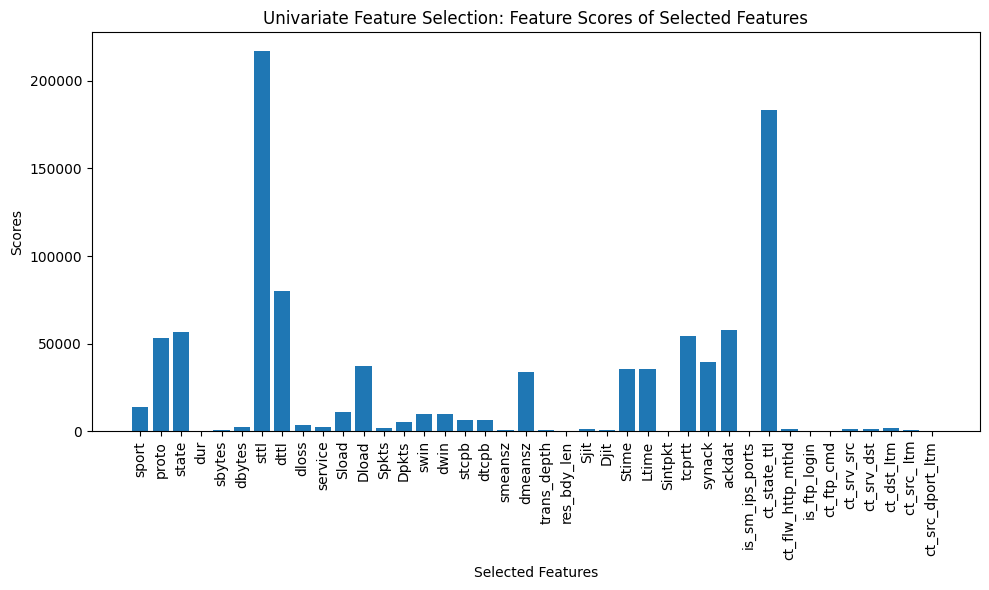

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib import pyplot as plt
X = df.drop(['srcip', 'dstip', 'Label', 'attack_cat'], axis=1)
Y = df["attack_cat"]


scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Select K Best features
selector = SelectKBest(score_func=f_regression, k=40)
X_new = selector.fit_transform(X_std, Y)

# Extract the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Get the feature scores (ensuring to handle NaN scores)
scores = selector.scores_
scores = np.nan_to_num(scores)

# Plotting feature scores
plt.figure(figsize=(10, 6))
plt.bar(selected_features, scores[selected_indices], tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Scores')
plt.title('Univariate Feature Selection: Feature Scores of Selected Features')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
## 'Selected' Features for Attack Cat
